In [1]:
library(Seurat)
library(ggplot2)
library(Matrix)
library(DoubletFinder)
library(dplyr) # for functions

library(cowplot)
library(ggplot2)
library(dplyr)
library(EnhancedVolcano)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggrepel



In [2]:
seurat <- readRDS(file ="~/data//retina/notebook/h5ad/28_10_RPE_Melano_TF_clust_1.rds")

In [3]:
seurat

An object of class Seurat 
32285 features across 16227 samples within 1 assay 
Active assay: RNA (32285 features, 1721 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [4]:
head(seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,pANN_0.25_0.09_1221,DF.classifications_0.25_0.09_1221,RNA_snn_res.2
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<fct>
AAACCTGAGCAAATCA-1,RDS,6767,2627,3.3397370,0.8927171,6,8,0.3930277,Singlet,8
AAACCTGAGCTAAACA-1,RDS,5172,2091,3.4802784,0.8940924,4,6,0.2516714,Singlet,6
AAACCTGAGCTCCTCT-1,RDS,4953,1953,2.4631536,0.8906142,2,4,0.1275072,Singlet,4
AAACCTGAGCTTTGGT-1,RDS,9837,3203,8.7933313,0.8779558,3,17,0.4288443,Singlet,17
AAACCTGAGGCATGTG-1,RDS,12923,3375,0.6500039,0.8581761,2,5,0.2593123,Singlet,5
AAACCTGAGGTAAACT-1,RDS,4340,1827,1.1981567,0.8967004,0,1,0.2292264,Singlet,1


In [5]:
levels(seurat)

[1] "Mesenchymal" "Perycytes"   "RPE"         "Melano"      "NK"         
[6] "Macrophages" "Endothelial" "Schwann"

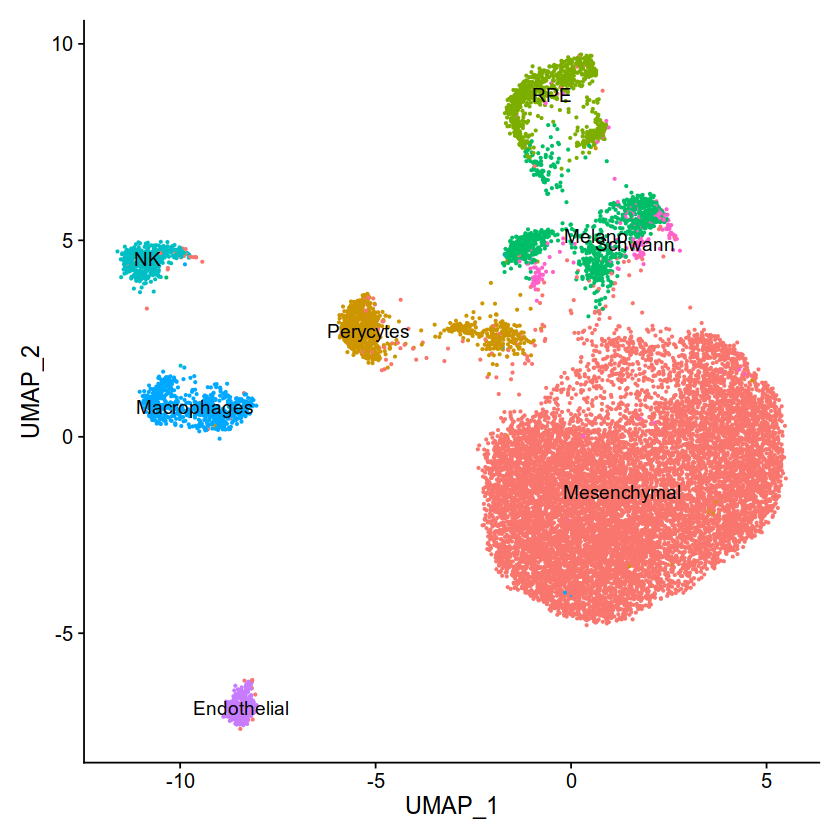

In [6]:
DimPlot(seurat, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [7]:
seurat.markers <- FindAllMarkers(seurat,   features = VariableFeatures(object = seurat))
seurat.markers %>%
    group_by(cluster) %>%
    slice_max(n = 2, order_by = avg_log2FC)

Calculating cluster Mesenchymal

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Perycytes

Calculating cluster RPE

Calculating cluster Melano

Calculating cluster NK

Calculating cluster Macrophages

Calculating cluster Endothelial

Calculating cluster Schwann



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.752260e-14,4.514227,0.016,0.001,1.534267e-09,Mesenchymal,Msc
1.773757e-69,3.609218,0.090,0.011,5.726573e-65,Mesenchymal,Zfp575
1.635442e-31,7.528751,0.010,0.000,5.280024e-27,Perycytes,Npas4
9.828429e-24,5.953878,0.010,0.000,3.173108e-19,Perycytes,Olig1
1.166215e-52,6.438055,0.016,0.000,3.765126e-48,RPE,Zscan10
7.209210e-54,5.216205,0.029,0.001,2.327493e-49,RPE,Gm14412
0.000000e+00,5.198071,0.332,0.019,0.000000e+00,Melano,Pax3
0.000000e+00,4.917930,0.271,0.017,0.000000e+00,Melano,Tbx1
1.361853e-261,9.536167,0.082,0.000,4.396742e-257,NK,Myb


In [8]:
head(seurat.markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
Pitx2,0,2.004771,0.801,0.267,0,Mesenchymal,Pitx2
Klf2,0,1.579544,0.951,0.578,0,Mesenchymal,Klf2
Tcf4,0,1.359166,0.708,0.338,0,Mesenchymal,Tcf4
Cebpd,0,2.654104,0.987,0.634,0,Mesenchymal,Cebpd
Fhl2,0,2.600013,0.452,0.102,0,Mesenchymal,Fhl2
Foxf2,0,2.321280,0.467,0.117,0,Mesenchymal,Foxf2


In [9]:
library(svglite)

In [13]:
options(repr.plot.width=6, repr.plot.height=6)

In [14]:
seurat.markers %>% 
    group_by(cluster) %>%
    top_n(n = 7, wt = avg_log2FC) -> top10
heat<-DoHeatmap(seurat, features = top10$gene, size = 2.5,
 # hjust = 0,
  angle = 80) 

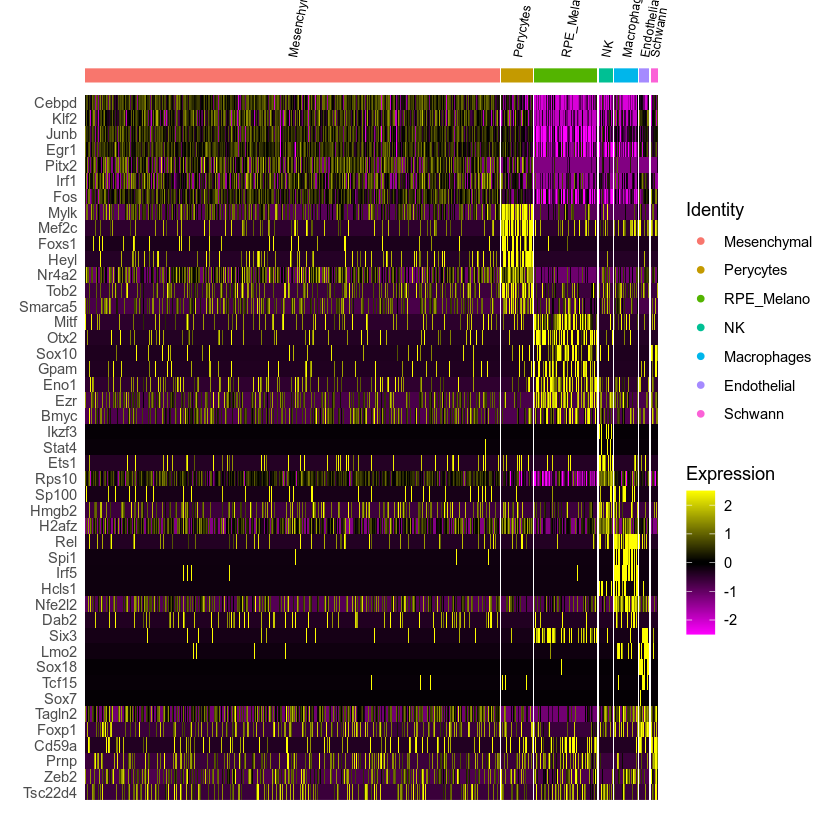

In [18]:
heat

In [21]:
svglite(filename = paste0('~/retina/notebook/4_11_heatmap/heat_map_melano_rpe_TFs_togeth.svg'), # put your path and name of choice
            width = 4,height = 6,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(heat) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

png 
  2

In [18]:
unique(seurat.markers$cluster) 

[1] Mesenchymal Perycytes   RPE         Melano      NK          Macrophages
[7] Endothelial Schwann    
8 Levels: Mesenchymal Perycytes RPE Melano NK Macrophages ... Schwann

In [19]:
f1=filter(seurat.markers, cluster == 'Mesenchymal')
f2=filter(seurat.markers, cluster == 'Perycytes')
f3=filter(seurat.markers, cluster == 'RPE')
f4=filter(seurat.markers, cluster == 'Melano')
f5=filter(seurat.markers, cluster == 'NK')
f6=filter(seurat.markers, cluster == 'Macrophages')
f7=filter(seurat.markers, cluster == 'Endothelial')
f8=filter(seurat.markers, cluster == 'Schwann')

In [20]:
Mesenchymal=(f1$gene)
Perycytes=(f2$gene)
RPE=(f3$gene)
Melano=(f4$gene)
NK=(f5$gene)
Macrophages=(f6$gene)
Endothelial=(f7$gene)
Schwann=(f8$gene)

In [24]:
list_tF<-c('1700080O16Rik', '1810024B03Rik', '2010315B03Rik', '2310011J03Rik', '2610021A01Rik', '2610044O15Rik8', '3300002I08Rik', '3830417A13Rik', '5730507C01Rik', '6720489N17Rik', '9030624G23Rik', '9130019O22Rik', '9130023H24Rik', 'A1cf', 'AI987944', 'AU041133', 'AW146154', 'Abcf2', 'Abl1', 'Acaa1a', 'Acaa1b', 'Aco1', 'Adarb1', 'Adnp', 'Adnp2', 'Aebp2', 'Aff4', 'Agap2', 'Aggf1', 'Agmat', 'Ahctf1', 'Ahdc1', 'Ahr', 'Ahrr', 'Aire', 'Ak6', 'Akr1a1', 'Alx1', 'Alx3', 'Alx4', 'Anxa1', 'Anxa11', 'Apex1', 'Apex2', 'Ar', 'Arfgap1', 'Arg1', 'Arg2', 'Arid3a', 'Arid3b', 'Arid3c', 'Arid5a', 'Arid5b', 'Arnt', 'Arnt2', 'Arntl', 'Arntl2', 'Arx', 'Asap3', 'Ascc1', 'Ascl1', 'Ascl2', 'Ash2l', 'Aspscr1', 'Atf1', 'Atf2', 'Atf3', 'Atf4', 'Atf5', 'Atf6', 'Atf6b', 'Atf7', 'Atoh1', 'Atoh7', 'Atoh8', 'Aven', 'B230307C23Rik', 'BC005561', 'BC025920', 'Bach1', 'Bach2', 'Bad', 'Banp', 'Barhl1', 'Barhl2', 'Barx1', 'Barx2', 'Batf', 'Batf3', 'Bax', 'Bbx', 'Bcl11a', 'Bcl11b', 'Bcl3', 'Bcl6', 'Bcl6b', 'Bclaf1', 'Bdp1', 'Bhlha15', 'Bhlhe22', 'Bhlhe23', 'Bhlhe40', 'Bhlhe41', 'Bmyc', 'Bnc1', 'Bnc2', 'Boll', 'Borcs8', 'Bptf', 'Brca1', 'Brf1', 'Brf2', 'Bsx', 'Canx', 'Carf', 'Cat', 'Cbfa2t2', 'Cbfb', 'Cbx3', 'Cbx7', 'Ccdc25', 'Ccnt2', 'Cd59a', 'Cd59b', 'Cdc5l', 'Cdk2ap1', 'Cdx1', 'Cdx2', 'Cdx4', 'Cebpa', 'Cebpb', 'Cebpd', 'Cebpg', 'Cebpz', 'Celf4', 'Celf5', 'Celf6', 'Cenpb', 'Cers2', 'Cers3', 'Cers4', 'Cers5', 'Cers6', 'Cfl2', 'Champ1', 'Chd1', 'Chd2', 'Churc1', 'Cic', 'Ckmt1', 'Clk1', 'Clock', 'Cnot3', 'Cnot4', 'Cnot6', 'Cpeb1', 'Cpsf4', 'Cptp', 'Creb1', 'Creb3', 'Creb3l1', 'Creb3l2', 'Creb3l4', 'Creb5', 'Crebl2', 'Crebzf', 'Crem', 'Crtc2', 'Crx', 'Csnk2b', 'Cstf2', 'Ctbp1', 'Ctbp2', 'Ctcf', 'Ctcfl', 'Ctnnb1', 'Cux1', 'Cux2', 'Cxxc1', 'Cxxc5', 'Cyb5r1', 'Cycs', 'D130040H23Rik', 'Dab2', 'Dach1', 'Dazap1', 'Dbp', 'Dbx1', 'Dbx2', 'Ddit3', 'Ddx20', 'Ddx4', 'Ddx43', 'Deaf1', 'Dgcr8', 'Dhx36', 'Diablo', 'Dido1', 'Dis3', 'Dlx1', 'Dlx2', 'Dlx3', 'Dlx4', 'Dlx5', 'Dlx6', 'Dmap1', 'Dmbx1', 'Dmc1', 'Dmrt1', 'Dmrt2', 'Dmrt3', 'Dmrta1', 'Dmrta2', 'Dmrtb1', 'Dmrtc2', 'Dnajc21', 'Dnmt1', 'Dnmt3a', 'Dnttip1', 'Dpf1', 'Dpf2', 'Dr1', 'Drap1', 'Dtl', 'Dus3l', 'Dusp22', 'Dusp26', 'Duxbl1', 'Duxbl3', 'E2f1', 'E2f2', 'E2f3', 'E2f4', 'E2f5', 'E2f6', 'E2f7', 'E2f8', 'E430018J23Rik', 'E4f1', 'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4', 'Ecsit', 'Edn1', 'Eef1akmt3', 'Eef1d', 'Egr1', 'Egr2', 'Egr3', 'Egr4', 'Ehf', 'Eif5a2', 'Elf1', 'Elf2', 'Elf3', 'Elf4', 'Elf5', 'Elk1', 'Elk3', 'Elk4', 'Emx1', 'Emx2', 'En1', 'En2', 'Eno1', 'Eno1b', 'Eomes', 'Ep300', 'Epas1', 'Erf', 'Erg', 'Esr1', 'Esr2', 'Esrp1', 'Esrp2', 'Esrra', 'Esrrb', 'Esrrg', 'Esx1', 'Etfb', 'Ets1', 'Ets2', 'Etv1', 'Etv2', 'Etv3', 'Etv4', 'Etv5', 'Etv6', 'Evx1', 'Ewsr1', 'Exo5', 'Exosc3', 'Ezh2', 'Ezr', 'Faap24', 'Fank1', 'Fbxl19', 'Ferd3l', 'Fev', 'Fez1', 'Fezf1', 'Fezf2', 'Fgf15', 'Fhl2', 'Fiz1', 'Fli1', 'Fos', 'Fosb', 'Fosl1', 'Fosl2', 'Foxa1', 'Foxa2', 'Foxa3', 'Foxb1', 'Foxb2', 'Foxc1', 'Foxc2', 'Foxd1', 'Foxd2', 'Foxd3', 'Foxd4', 'Foxe1', 'Foxe3', 'Foxf1', 'Foxf2', 'Foxg1', 'Foxh1', 'Foxi2', 'Foxi3', 'Foxj1', 'Foxj2', 'Foxj3', 'Foxk1', 'Foxk2', 'Foxl1', 'Foxl2', 'Foxm1', 'Foxn1', 'Foxn2', 'Foxn3', 'Foxn4', 'Foxo1', 'Foxo3', 'Foxo4', 'Foxo6', 'Foxp1', 'Foxp2', 'Foxp3', 'Foxp4', 'Foxq1', 'Foxr1', 'Foxr2', 'Foxs1', 'Frem1', 'Fubp1', 'Gabpa', 'Gabpb1', 'Gadd45a', 'Gar1', 'Gata1', 'Gata2', 'Gata3', 'Gata4', 'Gata5', 'Gata6', 'Gatad1', 'Gatad2a', 'Gbx1', 'Gbx2', 'Gcm1', 'Gcm2', 'Gfi1', 'Gfi1b', 'Git2', 'Gli1', 'Gli2', 'Gli3', 'Glis1', 'Glis2', 'Glis3', 'Glyctk', 'Gm10053', 'Gm10130', 'Gm10479', 'Gm10778', 'Gm12166', 'Gm12184', 'Gm13212', 'Gm14288', 'Gm14295', 'Gm14305', 'Gm14308', 'Gm14322', 'Gm14325', 'Gm14326', 'Gm14327', 'Gm14391', 'Gm14399', 'Gm14403', 'Gm14406', 'Gm14410', 'Gm14412', 'Gm14418', 'Gm14419', 'Gm14434', 'Gm14435', 'Gm14443', 'Gm14444', 'Gm15446', 'Gm17655', 'Gm2000', 'Gm2007', 'Gm2026', 'Gm20939', 'Gm21411', 'Gm28557', 'Gm3055', 'Gm35315', 'Gm3604', 'Gm38394', 'Gm3854', 'Gm45871', 'Gm4631', 'Gm4724', 'Gm4767', 'Gm4881', 'Gm4922', 'Gm4924', 'Gm49527', 'Gm5751', 'Gm6592', 'Gm6710', 'Gm6871', 'Gm7072', 'Gm7168', 'Gm9833', 'Gmeb1', 'Gmeb2', 'Got1', 'Gpam', 'Gpank1', 'Gpbp1l1', 'Gpd1', 'Grhl1', 'Grhl2', 'Grhl3', 'Grhpr', 'Gsc', 'Gsc2', 'Gsx1', 'Gsx2', 'Gtf2a1', 'Gtf2a1l', 'Gtf2a2', 'Gtf2b', 'Gtf2f1', 'Gtf2h3', 'Gtf2i', 'Gtf2ird1', 'Gtf3a', 'Gtf3c2', 'Gtf3c5', 'Gtpbp1', 'Gtpbp6', 'Gzf1', 'H1fx', 'H2afy', 'H2afz', 'Hand1', 'Hand2', 'Hbp1', 'Hcfc1', 'Hcfc2', 'Hcls1', 'Hdac1', 'Hdac2', 'Hdac3', 'Hdac6', 'Hdac8', 'Hdx', 'Helt', 'Hes1', 'Hes2', 'Hes5', 'Hes6', 'Hes7', 'Hesx1', 'Hey1', 'Hey2', 'Heyl', 'Hhat', 'Hhex', 'Hic1', 'Hic2', 'Hif1a', 'Hif3a', 'Hinfp', 'Hirip3', 'Hist2h2ab', 'Hivep1', 'Hivep2', 'Hivep3', 'Hlcs', 'Hlf', 'Hltf', 'Hlx', 'Hmbox1', 'Hmg20a', 'Hmg20b', 'Hmga1', 'Hmga1b', 'Hmga2', 'Hmgb1', 'Hmgb2', 'Hmgb3', 'Hmgb4', 'Hmgn3', 'Hmgxb3', 'Hmgxb4', 'Hmx1', 'Hmx2', 'Hmx3', 'Hnf1a', 'Hnf1b', 'Hnf4a', 'Hnf4g', 'Hnrnpa0', 'Hnrnpc', 'Hnrnph3', 'Hnrnpll', 'Hnrnpul1', 'Homez', 'Hoxa1', 'Hoxa10', 'Hoxa11', 'Hoxa13', 'Hoxa2', 'Hoxa3', 'Hoxa4', 'Hoxa5', 'Hoxa6', 'Hoxa7', 'Hoxa9', 'Hoxb1', 'Hoxb2', 'Hoxb3', 'Hoxb4', 'Hoxb5', 'Hoxb6', 'Hoxb7', 'Hoxb8', 'Hoxb9', 'Hoxc10', 'Hoxc11', 'Hoxc4', 'Hoxc5', 'Hoxc6', 'Hoxc8', 'Hoxc9', 'Hoxd1', 'Hoxd10', 'Hoxd11', 'Hoxd13', 'Hoxd3', 'Hoxd4', 'Hoxd8', 'Hoxd9', 'Hp1bp3', 'Hsf1', 'Hsf2', 'Hsf3', 'Hsf4', 'Hsf5', 'Hspa1l', 'Hspa5', 'Htatip2', 'Id1', 'Id2', 'Id4', 'Ikzf1', 'Ikzf2', 'Ikzf3', 'Ikzf4', 'Ikzf5', 'Ilf2', 'Ilf3', 'Ing3', 'Ing4', 'Insm1', 'Insm2', 'Irf1', 'Irf2', 'Irf3', 'Irf4', 'Irf5', 'Irf6', 'Irf7', 'Irf8', 'Irf9', 'Irx1', 'Irx2', 'Irx3', 'Irx4', 'Irx5', 'Irx6', 'Isl1', 'Isl2', 'Isx', 'Ivd', 'Jazf1', 'Jdp2', 'Jun', 'Junb', 'Jund', 'Kat2a', 'Kat7', 'Kcnip1', 'Kdm2a', 'Kdm2b', 'Kdm4a', 'Kdm4b', 'Kdm4c', 'Kdm4d', 'Kdm5a', 'Kdm5b', 'Kdm5d', 'Kdm7a', 'Kif22', 'Klf1', 'Klf10', 'Klf11', 'Klf12', 'Klf13', 'Klf14', 'Klf15', 'Klf16', 'Klf2', 'Klf3', 'Klf4', 'Klf5', 'Klf6', 'Klf7', 'Klf8', 'Klf9', 'Kmt2a', 'Kmt2b', 'Larp1', 'Larp4', 'Las1l', 'Lbx1', 'Lbx2', 'Lcor', 'Lcorl', 'Ldb1', 'Lef1', 'Lhx1', 'Lhx2', 'Lhx3', 'Lhx4', 'Lhx5', 'Lhx6', 'Lhx8', 'Lhx9', 'Lin28a', 'Lin28b', 'Lmo2', 'Lmx1a', 'Lmx1b', 'Lrrfip1', 'Lsm6', 'Ltf', 'Luzp1', 'Luzp2', 'Lyl1', 'Maf', 'Mafa', 'Mafb', 'Maff', 'Mafg', 'Mafk', 'Magoh', 'Map4k2', 'Mapk1', 'Max', 'Maz', 'Mbd1', 'Mbd2', 'Mbd4', 'Mbnl2', 'Mbtps2', 'Mctp2', 'Mdm2', 'Mecom', 'Mecp2', 'Med30', 'Mef2a', 'Mef2b', 'Mef2c', 'Mef2d', 'Meis1', 'Meis2', 'Meis3', 'Meox1', 'Meox2', 'Mesp1', 'Mesp2', 'Mettl14', 'Mettl3', 'Mex3c', 'Mga', 'Mief1', 'Mios', 'Mitf', 'Mixl1', 'Mkx', 'Mllt10', 'Mlx', 'Mlxip', 'Mlxipl', 'Mnt', 'Mnx1', 'Morn1', 'Mrpl1', 'Mrpl2', 'Mrps25', 'Msantd3', 'Msc', 'Msgn1', 'Msi1', 'Msi2', 'Msra', 'Msrb3', 'Msx1', 'Msx2', 'Msx3', 'Mta3', 'Mterf1a', 'Mterf1b', 'Mtf1', 'Mtf2', 'Mthfd1', 'Mxd1', 'Mxd3', 'Mxd4', 'Mxi1', 'Myb', 'Mybl1', 'Mybl2', 'Myc', 'Mycl', 'Mycn', 'Mycs', 'Myef2', 'Myf5', 'Myf6', 'Mylk', 'Mynn', 'Myod1', 'Myog', 'Mypop', 'Myrf', 'Mzf1', 'Nags', 'Nanog', 'Nanos1', 'Nap1l1', 'Ncald', 'Ncbp2', 'Ncoa1', 'Ncoa2', 'Ncoa3', 'Ncor1', 'Ncor2', 'Nelfa', 'Nelfb', 'Nelfe', 'Neurod1', 'Neurod2', 'Neurog1', 'Neurog2', 'Neurog3', 'Nf1', 'Nfat5', 'Nfatc1', 'Nfatc2', 'Nfatc3', 'Nfatc4', 'Nfe2', 'Nfe2l1', 'Nfe2l2', 'Nfe2l3', 'Nfia', 'Nfib', 'Nfic', 'Nfil3', 'Nfix', 'Nfkb1', 'Nfkb2', 'Nfx1', 'Nfxl1', 'Nfya', 'Nfyb', 'Nfyc', 'Nhlh1', 'Nhlh2', 'Nkx1-1', 'Nkx1-2', 'Nkx2-1', 'Nkx2-2', 'Nkx2-3', 'Nkx2-4', 'Nkx2-5', 'Nkx2-6', 'Nkx2-9', 'Nkx3-1', 'Nkx3-2', 'Nkx6-1', 'Nkx6-2', 'Nkx6-3', 'Nme1', 'Nmi', 'Nmral1', 'Nnt', 'Nobox', 'Noc2l', 'Nono', 'Noto', 'Npas2', 'Npas4', 'Npdc1', 'Nr0b1', 'Nr1d1', 'Nr1d2', 'Nr1h2', 'Nr1h3', 'Nr1h4', 'Nr1h5', 'Nr1i2', 'Nr1i3', 'Nr2c1', 'Nr2c2', 'Nr2e1', 'Nr2e3', 'Nr2f1', 'Nr2f2', 'Nr2f6', 'Nr3c1', 'Nr3c2', 'Nr4a1', 'Nr4a2', 'Nr4a3', 'Nr5a1', 'Nr5a2', 'Nr6a1', 'Nrf1', 'Nrl', 'Nuak1', 'Nuak2', 'Nucb1', 'Nup107', 'Nup133', 'Nxph3', 'Obox1', 'Obox3', 'Obox6', 'Odc1', 'Olig1', 'Olig2', 'Olig3', 'Onecut1', 'Onecut2', 'Onecut3', 'Osr1', 'Osr2', 'Otp', 'Otud4', 'Otx1', 'Otx2', 'Ovol1', 'Ovol2', 'Ovol3', 'P4hb', 'Parp1', 'Patz1', 'Pax1', 'Pax2', 'Pax3', 'Pax5', 'Pax6', 'Pax7', 'Pax8', 'Pax9', 'Paxip1', 'Pbx1', 'Pbx2', 'Pbx3', 'Pbx4', 'Pck2', 'Pdcd11', 'Pde6h', 'Pdlim5', 'Pds5a', 'Pdx1', 'Peg3', 'Pgam2', 'Pgr', 'Phf1', 'Phf2', 'Phf20', 'Phf21a', 'Phf8', 'Phlda2', 'Phox2a', 'Phox2b', 'Phtf1', 'Pick1', 'Pik3c3', 'Pir', 'Pitx1', 'Pitx2', 'Pitx3', 'Pkm', 'Pknox1', 'Pknox2', 'Plag1', 'Plagl1', 'Plagl2', 'Plg', 'Pml', 'Pold2', 'Pole3', 'Pole4', 'Poli', 'Polr3a', 'Polr3g', 'Pou1f1', 'Pou2af1', 'Pou2f1', 'Pou2f2', 'Pou2f3', 'Pou3f1', 'Pou3f2', 'Pou3f3', 'Pou3f4', 'Pou4f1', 'Pou4f2', 'Pou5f1', 'Pou6f1', 'Pou6f2', 'Ppara', 'Ppard', 'Pparg', 'Ppargc1a', 'Ppp1r10', 'Ppp2r3d', 'Ppp5c', 'Pqbp1', 'Prdm1', 'Prdm10', 'Prdm11', 'Prdm12', 'Prdm13', 'Prdm14', 'Prdm15', 'Prdm16', 'Prdm4', 'Prdm5', 'Prdm6', 'Prdm9', 'Prdx5', 'Prkaa1', 'Prkaa2', 'Prnp', 'Prop1', 'Prox1', 'Prox2', 'Prrx1', 'Prrx2', 'Prrxl1', 'Psma6', 'Psmc2', 'Psmd12', 'Ptcd1', 'Ptf1a', 'Pum3', 'Pura', 'Purg', 'R3hdm2', 'Rab14', 'Rab18', 'Rab2a', 'Rab7', 'Rad21', 'Ran', 'Rara', 'Rarb', 'Rarg', 'Rax', 'Rb1', 'Rbak', 'Rbbp5', 'Rbbp9', 'Rbfox2', 'Rbm17', 'Rbm22', 'Rbm3', 'Rbm42', 'Rbm7', 'Rbm8a2', 'Rbms1', 'Rbpj', 'Rbpjl', 'Rcor1', 'Rel', 'Rela', 'Relb', 'Rest', 'Rex2', 'Rfc2', 'Rfc3', 'Rfx1', 'Rfx2', 'Rfx3', 'Rfx4', 'Rfx5', 'Rfx6', 'Rfx7', 'Rfx8', 'Rfxank', 'Rfxap', 'Rhox4e', 'Rhox6', 'Rlf', 'Rnaseh2c', 'Rnf114', 'Rnf138', 'Rora', 'Rorb', 'Rorc', 'Rpl35', 'Rpl6', 'Rpp25', 'Rps10', 'Rps4x', 'Rps6ka5', 'Rreb1', 'Rsl1', 'Rslcan18', 'Rufy3', 'Runx1', 'Runx2', 'Runx3', 'Ruvbl1', 'Rxra', 'Rxrb', 'Rxrg', 'Sall1', 'Sall2', 'Sall3', 'Sall4', 'Sap30', 'Satb1', 'Satb2', 'Scmh1', 'Scrt1', 'Scrt2', 'Scx', 'Sebox', 'Sema4a', 'Setbp1', 'Setdb1', 'Sf1', 'Sf3b1', 'Sfpq', 'Sft2d1', 'Shox2', 'Sim1', 'Sim2', 'Sin3a', 'Sirt6', 'Six1', 'Six2', 'Six3', 'Six4', 'Six5', 'Six6', 'Ski', 'Skor1', 'Skor2', 'Slc18a1', 'Smad1', 'Smad2', 'Smad3', 'Smad4', 'Smad5', 'Smad6', 'Smad7', 'Smad9', 'Smap2', 'Smarca1', 'Smarca4', 'Smarca5', 'Smarcb1', 'Smarcc1', 'Smarcc2', 'Smc3', 'Smpx', 'Smug1', 'Snai1', 'Snai2', 'Snai3', 'Snapc4', 'Snapc5', 'Snd1', 'Snrnp70', 'Snrpb2', 'Socs4', 'Sod1', 'Sohlh2', 'Sox1', 'Sox10', 'Sox11', 'Sox12', 'Sox13', 'Sox14', 'Sox15', 'Sox17', 'Sox18', 'Sox2', 'Sox21', 'Sox3', 'Sox30', 'Sox4', 'Sox5', 'Sox6', 'Sox7', 'Sox8', 'Sox9', 'Sp1', 'Sp100', 'Sp110', 'Sp2', 'Sp3', 'Sp4', 'Sp5', 'Sp6', 'Sp7', 'Sp8', 'Sp9', 'Spag7', 'Spats2', 'Spdef', 'Spi1', 'Spib', 'Spr', 'Srbd1', 'Srebf1', 'Srebf2', 'Srf', 'Srp9', 'Srrm3', 'Ssbp3', 'Ssrp1', 'Stat1', 'Stat2', 'Stat3', 'Stat4', 'Stat5a', 'Stat5b', 'Stat6', 'Stau2', 'Stub1', 'Suclg1', 'Supt20', 'Suz12', 'T', 'Taf1', 'Taf1a', 'Taf6', 'Taf7', 'Taf9', 'Tagln2', 'Tal1', 'Tal2', 'Tbl1xr1', 'Tbp', 'Tbpl1', 'Tbr1', 'Tbx1', 'Tbx10', 'Tbx15', 'Tbx18', 'Tbx19', 'Tbx2', 'Tbx20', 'Tbx21', 'Tbx22', 'Tbx3', 'Tbx4', 'Tbx5', 'Tbx6', 'Tceal3', 'Tceal5', 'Tceal6', 'Tcf12', 'Tcf15', 'Tcf21', 'Tcf24', 'Tcf3', 'Tcf4', 'Tcf7', 'Tcf7l1', 'Tcf7l2', 'Tcfl5', 'Tead1', 'Tead2', 'Tead3', 'Tef', 'Terf1', 'Terf2', 'Tet1', 'Tfam', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2d', 'Tfap2e', 'Tfap4', 'Tfcp2', 'Tfcp2l1', 'Tfdp1', 'Tfdp2', 'Tfe3', 'Tfeb', 'Tfec', 'Tff3', 'Tgif1', 'Tgif2', 'Thap1', 'Thap11', 'Thap12', 'Thoc2', 'Thra', 'Thrb', 'Tia1', 'Timeless', 'Timm44', 'Timm8a1', 'Timm8a2', 'Tlx1', 'Tlx2', 'Tlx3', 'Tmem33', 'Tob2', 'Topors', 'Tpi1', 'Tppp', 'Traf4', 'Trerf1', 'Trim21', 'Trim24', 'Trim28', 'Trim33', 'Trim66', 'Trim69', 'Trip10', 'Trmo', 'Trmt1', 'Trp53', 'Trp63', 'Trp73', 'Trps1', 'Tsc22d4', 'Tsn', 'Tsnax', 'Tulp1', 'Twist1', 'Twist2', 'U2af1', 'Ube2k', 'Ube2v1', 'Ubp1', 'Ubtf', 'Ubxn1', 'Ugp2', 'Uncx', 'Uqcrb', 'Usf1', 'Usf2', 'Usp39', 'Utp18', 'Vamp3', 'Vax1', 'Vax2', 'Vdr', 'Vezf1', 'Vps4b', 'Vps72', 'Vsx1', 'Vsx2', 'Wdr83', 'Wrnip1', 'Wt1', 'Xbp1', 'Xpa', 'Xrcc1', 'Xrcc4', 'Ybx1', 'Yeats4', 'Yod1', 'Ywhae', 'Ywhaz', 'Yy1', 'Zbtb1', 'Zbtb10', 'Zbtb11', 'Zbtb12', 'Zbtb14', 'Zbtb16', 'Zbtb17', 'Zbtb18', 'Zbtb2', 'Zbtb20', 'Zbtb21', 'Zbtb22', 'Zbtb24', 'Zbtb25', 'Zbtb26', 'Zbtb3', 'Zbtb32', 'Zbtb33', 'Zbtb34', 'Zbtb37', 'Zbtb38', 'Zbtb39', 'Zbtb4', 'Zbtb40', 'Zbtb41', 'Zbtb42', 'Zbtb43', 'Zbtb44', 'Zbtb45', 'Zbtb46', 'Zbtb48', 'Zbtb49', 'Zbtb5', 'Zbtb6', 'Zbtb7a', 'Zbtb7b', 'Zbtb7c', 'Zbtb8a', 'Zbtb8b', 'Zc3h11a', 'Zc3h7a', 'Zcchc14', 'Zcchc17', 'Zdhhc15', 'Zdhhc24', 'Zdhhc5', 'Zeb1', 'Zeb2', 'Zfhx2', 'Zfhx3', 'Zfp1', 'Zfp101', 'Zfp105', 'Zfp108', 'Zfp109', 'Zfp11', 'Zfp110', 'Zfp111', 'Zfp112', 'Zfp113', 'Zfp114', 'Zfp119a', 'Zfp119b', 'Zfp12', 'Zfp120', 'Zfp128', 'Zfp13', 'Zfp131', 'Zfp14', 'Zfp142', 'Zfp143', 'Zfp146', 'Zfp148', 'Zfp160', 'Zfp169', 'Zfp174', 'Zfp180', 'Zfp182', 'Zfp184', 'Zfp189', 'Zfp2', 'Zfp202', 'Zfp207', 'Zfp212', 'Zfp213', 'Zfp217', 'Zfp219', 'Zfp235', 'Zfp236', 'Zfp239', 'Zfp24', 'Zfp248', 'Zfp251', 'Zfp260', 'Zfp263', 'Zfp266', 'Zfp27', 'Zfp273', 'Zfp275', 'Zfp276', 'Zfp28', 'Zfp280b', 'Zfp280d', 'Zfp281', 'Zfp282', 'Zfp286', 'Zfp287', 'Zfp296', 'Zfp3', 'Zfp30', 'Zfp300', 'Zfp316', 'Zfp317', 'Zfp319', 'Zfp322a', 'Zfp324', 'Zfp326', 'Zfp329', 'Zfp334', 'Zfp335', 'Zfp341', 'Zfp35', 'Zfp354a', 'Zfp354b', 'Zfp354c', 'Zfp358', 'Zfp362', 'Zfp366', 'Zfp367', 'Zfp369', 'Zfp37', 'Zfp382', 'Zfp383', 'Zfp384', 'Zfp385a', 'Zfp386', 'Zfp39', 'Zfp397', 'Zfp398', 'Zfp407', 'Zfp408', 'Zfp41', 'Zfp410', 'Zfp414', 'Zfp42', 'Zfp420', 'Zfp422', 'Zfp423', 'Zfp426', 'Zfp429', 'Zfp433', 'Zfp438', 'Zfp442', 'Zfp444', 'Zfp445', 'Zfp449', 'Zfp451', 'Zfp454', 'Zfp455', 'Zfp456', 'Zfp457', 'Zfp458', 'Zfp459', 'Zfp46', 'Zfp462', 'Zfp467', 'Zfp472', 'Zfp493', 'Zfp503', 'Zfp507', 'Zfp511', 'Zfp512', 'Zfp513', 'Zfp516', 'Zfp518a', 'Zfp521', 'Zfp523', 'Zfp524', 'Zfp526', 'Zfp532', 'Zfp534', 'Zfp536', 'Zfp54', 'Zfp541', 'Zfp551', 'Zfp553', 'Zfp558', 'Zfp560', 'Zfp563', 'Zfp566', 'Zfp568', 'Zfp57', 'Zfp574', 'Zfp575', 'Zfp579', 'Zfp58', 'Zfp580', 'Zfp583', 'Zfp59', 'Zfp592', 'Zfp595', 'Zfp597', 'Zfp598', 'Zfp60', 'Zfp605', 'Zfp606', 'Zfp607a', 'Zfp607b', 'Zfp61', 'Zfp612', 'Zfp617', 'Zfp62', 'Zfp622', 'Zfp623', 'Zfp626', 'Zfp628', 'Zfp629', 'Zfp637', 'Zfp639', 'Zfp64', 'Zfp641', 'Zfp644', 'Zfp646', 'Zfp647', 'Zfp65', 'Zfp651', 'Zfp652', 'Zfp653', 'Zfp654', 'Zfp655', 'Zfp661', 'Zfp664', 'Zfp667', 'Zfp668', 'Zfp672', 'Zfp687', 'Zfp688', 'Zfp689', 'Zfp69', 'Zfp691', 'Zfp692', 'Zfp697', 'Zfp7', 'Zfp704', 'Zfp706', 'Zfp707', 'Zfp708', 'Zfp709', 'Zfp710', 'Zfp711', 'Zfp712', 'Zfp719', 'Zfp72', 'Zfp729a', 'Zfp729b', 'Zfp738', 'Zfp74', 'Zfp740', 'Zfp746', 'Zfp747', 'Zfp748', 'Zfp759', 'Zfp760', 'Zfp763', 'Zfp764', 'Zfp768', 'Zfp770', 'Zfp771', 'Zfp775', 'Zfp777', 'Zfp78', 'Zfp780b', 'Zfp781', 'Zfp784', 'Zfp786', 'Zfp787', 'Zfp790', 'Zfp791', 'Zfp799', 'Zfp800', 'Zfp809', 'Zfp81', 'Zfp811', 'Zfp819', 'Zfp82', 'Zfp820', 'Zfp821', 'Zfp825', 'Zfp830', 'Zfp831', 'Zfp84', 'Zfp846', 'Zfp85', 'Zfp850', 'Zfp853', 'Zfp866', 'Zfp867', 'Zfp868', 'Zfp869', 'Zfp87', 'Zfp870', 'Zfp871', 'Zfp872', 'Zfp874a', 'Zfp874b', 'Zfp879', 'Zfp882', 'Zfp9', 'Zfp90', 'Zfp91', 'Zfp92', 'Zfp93', 'Zfp930', 'Zfp931', 'Zfp932', 'Zfp933', 'Zfp937', 'Zfp938', 'Zfp94', 'Zfp941', 'Zfp942', 'Zfp943', 'Zfp944', 'Zfp945', 'Zfp946', 'Zfp947', 'Zfp949', 'Zfp950', 'Zfp951', 'Zfp952', 'Zfp955a', 'Zfp955b', 'Zfp958', 'Zfp959', 'Zfp960', 'Zfp961', 'Zfp963', 'Zfp964', 'Zfp965', 'Zfp966', 'Zfp967', 'Zfp968', 'Zfp97', 'Zfp970', 'Zfp971', 'Zfp973', 'Zfp974', 'Zfp975', 'Zfp976', 'Zfp978', 'Zfp979', 'Zfp980', 'Zfp981', 'Zfp984', 'Zfp985', 'Zfp986', 'Zfp987', 'Zfp988', 'Zfp989', 'Zfp990', 'Zfp991', 'Zfp992', 'Zfp993', 'Zfp994', 'Zfp995', 'Zfpm1', 'Zfx', 'Zfy1', 'Zgpat', 'Zhx1', 'Zhx2', 'Zhx3', 'Zic1', 'Zic2', 'Zic3', 'Zic4', 'Zic5', 'Zik1', 'Zkscan1', 'Zkscan14', 'Zkscan16', 'Zkscan17', 'Zkscan2', 'Zkscan3', 'Zkscan4', 'Zkscan5', 'Zkscan6', 'Zkscan7', 'Zkscan8', 'Zmat2', 'Zmat4', 'Zmiz1', 'Zrsr1', 'Zscan10', 'Zscan12', 'Zscan18', 'Zscan2', 'Zscan20', 'Zscan21', 'Zscan22', 'Zscan25', 'Zscan26', 'Zscan29', 'Zswim1', 'Zxdb', 'Zxdc', 'Zzz3')


In [25]:
Mesenchymal_<- c(list_tF %in% Mesenchymal)
Melano_<- c(list_tF %in% Melano)
RPE_<- c(list_tF %in% RPE)
Perycytes_<- c(list_tF %in% Perycytes)
NK_<- c(list_tF %in% NK)
Endothelial_<- c(list_tF %in% Endothelial)
Schwann_<- c(list_tF %in% Schwann)
Macrophages_<- c(list_tF %in% Macrophages)

In [26]:
df2 <- data.frame( Mesenchymal_, Melano_, RPE_, Perycytes_, NK_, Endothelial_,Schwann_, Macrophages_)
                    

In [27]:
head(df2)

,Mesenchymal_,Melano_,RPE_,Perycytes_,NK_,Endothelial_,Schwann_,Macrophages_
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
4,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [28]:
rownames(df2) <- list_tF
(df2)

,Mesenchymal_,Melano_,RPE_,Perycytes_,NK_,Endothelial_,Schwann_,Macrophages_
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1700080O16Rik,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
1810024B03Rik,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2010315B03Rik,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2310011J03Rik,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
2610021A01Rik,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2610044O15Rik8,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
3300002I08Rik,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3830417A13Rik,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5730507C01Rik,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [29]:
#convert all_star column to 1s and 0s
df2[,1] <- as.integer(as.logical(df2[,1]))
df2[,2] <- as.integer(as.logical(df2[,2]))
df2[,3] <- as.integer(as.logical(df2[,3]))
df2[,4] <- as.integer(as.logical(df2[,4]))
df2[,5] <- as.integer(as.logical(df2[,5]))
df2[,6] <- as.integer(as.logical(df2[,6]))
df2[,7] <- as.integer(as.logical(df2[,7]))
df2[,8] <- as.integer(as.logical(df2[,8]))
#df2[,9] <- as.integer(as.logical(df2[,9]))

In [30]:
head(df2)

,Mesenchymal_,Melano_,RPE_,Perycytes_,NK_,Endothelial_,Schwann_,Macrophages_
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1700080O16Rik,0,0,0,0,0,0,0,0
1810024B03Rik,0,1,1,0,0,0,0,0
2010315B03Rik,1,0,1,0,0,0,0,0
2310011J03Rik,0,0,1,1,0,0,0,0
2610021A01Rik,1,0,1,0,0,0,0,0
2610044O15Rik8,1,0,0,1,0,0,0,0


In [31]:
ans = df2[rowSums(df2[])>0,]

In [32]:
ans

,Mesenchymal_,Melano_,RPE_,Perycytes_,NK_,Endothelial_,Schwann_,Macrophages_
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1810024B03Rik,0,1,1,0,0,0,0,0
2010315B03Rik,1,0,1,0,0,0,0,0
2310011J03Rik,0,0,1,1,0,0,0,0
2610021A01Rik,1,0,1,0,0,0,0,0
2610044O15Rik8,1,0,0,1,0,0,0,0
9030624G23Rik,0,1,0,0,0,0,0,0
9130019O22Rik,0,0,1,0,0,1,0,0
9130023H24Rik,1,0,1,0,0,0,0,0
AI987944,1,0,1,0,0,0,0,0


In [33]:
ans_T=t(ans)
ans_T

,1810024B03Rik,2010315B03Rik,2310011J03Rik,2610021A01Rik,2610044O15Rik8,9030624G23Rik,9130019O22Rik,9130023H24Rik,AI987944,AU041133,⋯,Zscan2,Zscan21,Zscan22,Zscan25,Zscan26,Zscan29,Zswim1,Zxdb,Zxdc,Zzz3
Mesenchymal_,0,1,0,1,1,0,0,1,1,1,⋯,0,0,0,0,1,1,1,0,1,1
Melano_,1,0,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,1,1
RPE_,1,1,1,1,0,0,1,1,1,1,⋯,0,0,1,0,1,1,1,1,1,1
Perycytes_,0,0,1,0,1,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,0
NK_,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
Endothelial_,0,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Schwann_,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,1,0,0,0,0,1,1
Macrophages_,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,0


In [93]:
dist.data1<-dist(ans_T[1:8, 1:325])
dist.data1


             Mesenchymal_   Melano_      RPE_ Perycytes_       NK_ Endothelial_
Melano_         10.392305                                                      
RPE_            12.247449  9.591663                                            
Perycytes_      10.630146  9.327379 11.704700                                  
NK_             11.401754 10.000000 12.000000  10.440307                       
Endothelial_    11.224972 10.198039 12.409674  10.148892 10.583005             
Schwann_         9.110434  6.082763  9.643651   8.944272  9.110434     9.643651
Macrophages_    11.269428 10.049876 12.206556  10.392305  9.327379    10.344080
              Schwann_
Melano_               
RPE_                  
Perycytes_            
NK_                   
Endothelial_          
Schwann_              
Macrophages_  8.831761


Call:
hclust(d = dist.data1, method = "ward.D")

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 8 


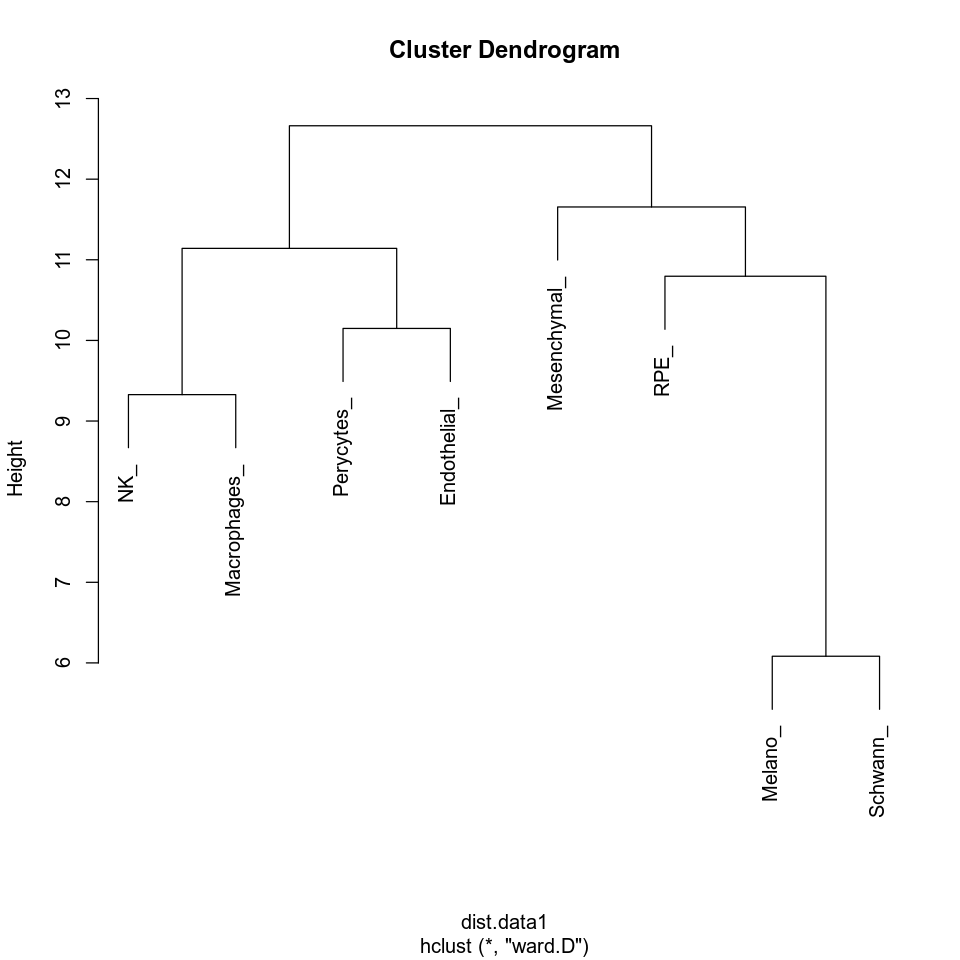

In [94]:
clust.data<-hclust(dist.data1, 'ward.D')
clust.data
plot(clust.data)


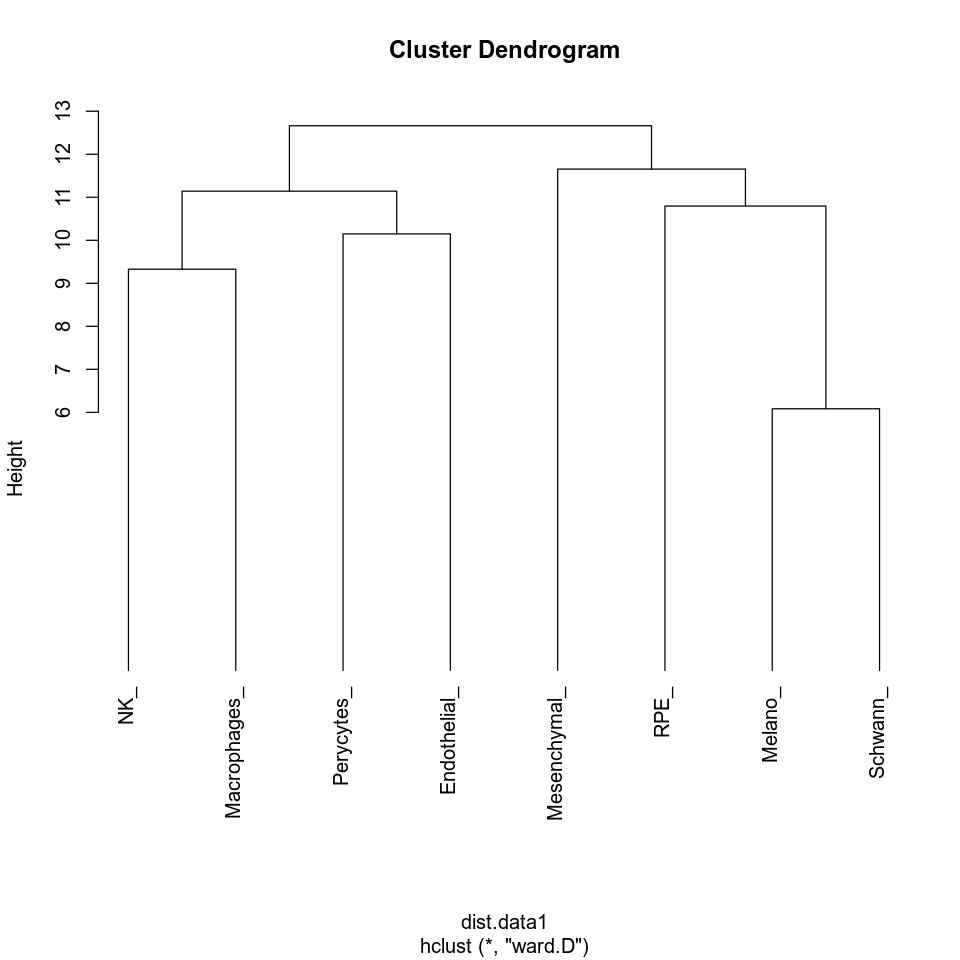

In [95]:
plot(clust.data, hang=-1)

In [98]:
write.csv(ans, file='~/retina/notebook/csv_cassiopea/28_10_RPE_MEL_on_TF_for_cassiopea.csv')